<a href="https://colab.research.google.com/github/BirasaDivine/Formative3_Group1/blob/main/Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probability Distributions

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Load the data
df=pd.read_csv('all_seasons.csv')

In [ ]:
print(df.head())

   Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_

In [ ]:
x = df['player_height'].values
y = df['player_weight'].values
print(x[:5])
print(y[:5])


[198.12 215.9  205.74 203.2  205.74]
[ 99.79024  117.93392   95.25432  100.697424 108.86208 ]


**Bivariate Normal Distribution Formula:**

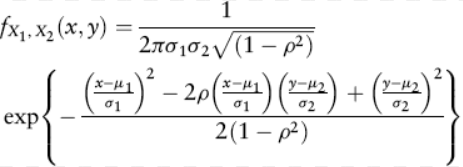
Where:



*   𝑥 : Height
*   𝑦 : Weight
*   𝜇𝑥: mean of x values
*   𝜇𝑦: mean of y values
*   σx: standard deviation of x
*   σy: standard deviation of y
*   ρ: correlation between x and y








In [ ]:
# Calculate the mean of x and y
n=len(x)
mean_x = sum(x) / n
mean_y = sum(y) / n

print("Mean of X (μx):", mean_x)
print("Mean of Y (μy):", mean_y)


Mean of X (μx): 200.81281830417785
Mean of Y (μy): 100.63786774840878


**Standard Deviation:**

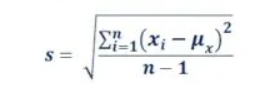

Where:


*   𝜇𝑥/𝜇𝑦: mean of x values/mean of y values
*   xi​/yi​: The value of X at position i in your dataset/The value of Y at position i in your dataset
*   n: The total number of data points in your dataset


In [ ]:
# Calculate the standard deviation
sigma_x = np.sqrt(sum((xi - mean_x)**2 for xi in x) / (n - 1))
sigma_y = np.sqrt(sum((yi - mean_y)**2 for yi in y) / (n - 1))

print("Std of X (σx):", sigma_x)
print("Std of Y (σy):", sigma_y)


Std of X (σx): 9.190973456084304
Std of Y (σy): 12.576294953015436


Correlation coefficient (ρ)

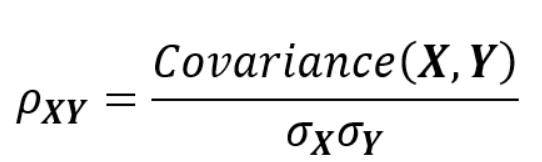


Covariance

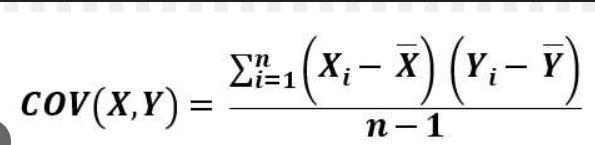





In [ ]:
# Calculate the correlation
# compute covariance
cov = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n)) / (n - 1)
#correlation from covariance
if sigma_x == 0 or sigma_y == 0:
    raise ValueError("Standard deviation sigma_x or sigma_y is zero — correlation is undefined.")
rho = cov / (sigma_x * sigma_y)
print("Covariance:", cov)
print("Correlation (ρ):", rho)



Covariance: 95.92697291377102
Correlation (ρ): 0.8299014317109396


Constant :
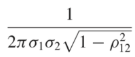

Exponent : 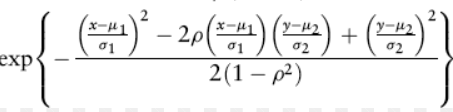

In [ ]:
import math

def bivariate_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    # Constant term
    C = 1 / (2 * math.pi * sigma_x * sigma_y * math.sqrt(1 - rho**2))

    # Exponent term
    exponent = -1 / (2 * (1 - rho**2)) * (
        ((x - mean_x)**2 / sigma_x**2)
        - (2 * rho * (x - mean_x) * (y - mean_y)) / (sigma_x * sigma_y)
        + ((y - mean_y)**2 / sigma_y**2)
    )

    return C * math.exp(exponent)


In [ ]:
pdf_values = [bivariate_pdf(x[i], y[i], mean_x, mean_y, sigma_x, sigma_y, rho) for i in range(n)]

# Convert to array for visualization
pdf_values = np.array(pdf_values)

print("First 5 PDF values:", pdf_values[:5])


First 5 PDF values: [0.00224985 0.00064136 0.00062847 0.00222171 0.00199273]


In [ ]:
# Create a grid of x and y values
x_grid, y_grid = np.meshgrid(
    np.linspace(min(x), max(x), 100),
    np.linspace(min(y), max(y), 100)
)

# Compute Z (PDF values) for each grid point
Z = np.zeros_like(x_grid)

for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        Z[i, j] = bivariate_pdf(x_grid[i, j], y_grid[i, j], mean_x, mean_y, sigma_x, sigma_y, rho)


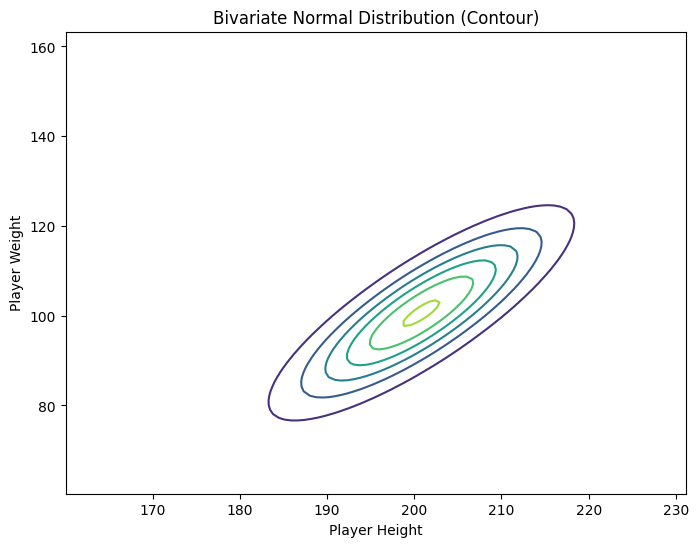

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.contour(x_grid, y_grid, Z, cmap='viridis')
plt.title('Bivariate Normal Distribution (Contour)')
plt.xlabel('Player Height')
plt.ylabel('Player Weight')
plt.show()


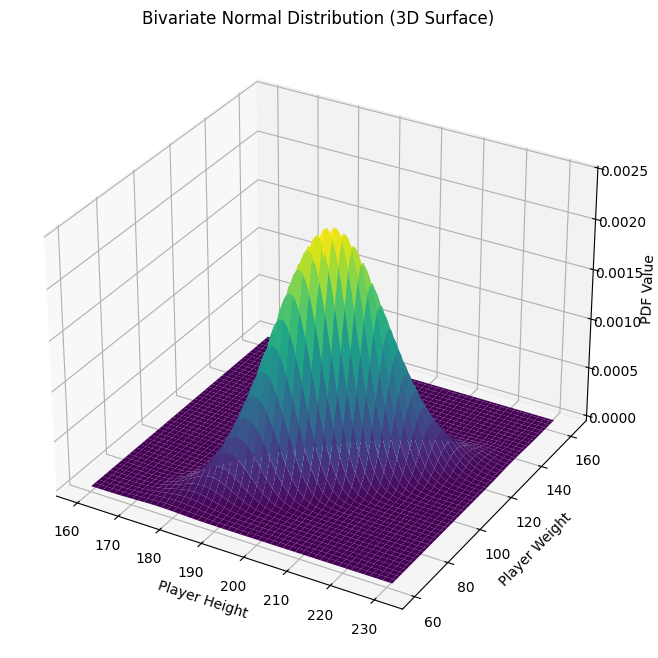

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x_grid, y_grid, Z, cmap='viridis')
ax.set_title('Bivariate Normal Distribution (3D Surface)')
ax.set_xlabel('Player Height')
ax.set_ylabel('Player Weight')
ax.set_zlabel('PDF Value')
plt.show()
